In [1]:
import time
start_time = time.time()
import os
HOME = os.environ['HOME']
os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3/Tes4')                 #both
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3')                    #2nd epoch
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2')                         #1st epoch

In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import mad_std, sigma_clip
import warnings
warnings.filterwarnings("ignore")

import exoplanet as xo

from arctor3 import Arctor, info_message                #This is the most modified version of Arctor

In [3]:
transit1 = [0,512,300,513]
transit2 = [0,512,178,220]
transit3 = [0,512,150,180]                            #Setting up where it's looking (these can be pretty big)

In [4]:
def instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type):
    planet = Arctor(
        planet_name=planet_name,
        data_dir=data_dir,
        working_dir=working_dir,
        file_type=file_type)

    joblib_filename = f'{planet_name}_savedict.joblib.save'
    joblib_filename = f'{working_dir}/{joblib_filename}'
    if os.path.exists(joblib_filename):
        info_message('Loading Data from Save File')
        planet.load_data(joblib_filename)
    else:
        info_message('Loading New Data Object')
        planet.load_data(transit)

    return planet

def create_raw_lc_stddev(planet):
    ppm = 1e6
    phot_vals = planet.photometry_df
    lc_std_rev = phot_vals.iloc[planet.idx_rev].std(axis=0)                
    lc_std_fwd = phot_vals.iloc[planet.idx_fwd].std(axis=0)                

    lc_med_rev = np.median(phot_vals.iloc[planet.idx_rev], axis=0)
    lc_med_fwd = np.median(phot_vals.iloc[planet.idx_rev], axis=0)

    lc_std = np.mean([lc_std_rev, lc_std_fwd], axis=0)
    lc_med = np.mean([lc_med_rev, lc_med_fwd], axis=0)

    return lc_std / lc_med * ppm

In [5]:
plot_verbose = False
save_now = False
planet_name = 'PlanetName'
file_type = 'flt.fits'

HOME = os.environ['HOME']
# base_dir = os.path.join(HOME, 'path', 'to', 'base')
# data_dir = os.path.join(base_dir, 'path', 'to', 'data')
# data_dir = os.path.join(data_dir, 'HST', 'FLTs')
# working_dir = os.path.join(base_dir, 'path', 'to', 'savefiles')
base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2', 'Tes3', 'Tes4')  
# base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2', 'Tes3')        #2nd epoch
# base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2')                #1st epoch
data_dir = os.path.join(base_dir)
data_dir = os.path.join(data_dir)
working_dir = os.path.join(base_dir)

In [6]:
transit = transit1
planet = instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type)
print(planet)

[INFO] Initializing Instance of the `Arctor` Object
[INFO] Loading New Data Object
[INFO] Loading Fits Files


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 337.95it/s]


[INFO] Creating New Flux/Error/Time Attributes


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 113.28it/s]


[INFO] Found 188 flt.fits files


In [7]:
planet.clean_cosmic_rays()
planet.calibration_trace_location()
planet.identify_trace_direction()
planet.simple_phots()
planet.center_all_traces()
planet.fit_trace_slopes()
planet.compute_sky_background(subpixels=32)
planet.compute_columnwise_sky_background()

[INFO] Flagging Cosmic Rays using `Temporal Simple` Technique


100%|█████████████████████████████████████████████████████████████████████████████████| 213/213 [00:10<00:00, 20.06it/s]


[INFO] Cosmic Ray Mask Creation Took 10.6223623752594 seconds
None
[INFO] Calibration the Median Trace Location
[INFO] Cubic Spline Interpolating the Median Trace Location
[INFO] Calibration the Per Image Trace Location


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 563.88it/s]


[INFO] Identifying Trace Direction per Image


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 451.85it/s]


[INFO] Computing the Center of the Trace


100%|█████████████████████████████████████████████████████████████████████████████████| 188/188 [02:38<00:00,  1.19it/s]


[INFO] Fitting a slope to the Center of the Trace


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 164.32it/s]


In [8]:
# Set up the list of aperture widths and heights to search
min_aper_width = 1
max_aper_width = 100
min_aper_height = 1
max_aper_height = 100

aper_widths = np.arange(min_aper_width, max_aper_width + 2, 5)
aper_heights = np.arange(min_aper_height, max_aper_height + 2, 5)

In [9]:
planet.do_multi_phot(aper_widths, aper_heights)                                    #This usually takes 8ish minutes
print("code took", (time.time()-start_time)/60, "minutes")

[INFO] Beginning Multi-Aperture Photometry
[INFO] Creating Apertures


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 127.50it/s]


[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image
[INFO] Aperture Photometry per Image took 654.6777303218842 seconds for 82908 apertures.
[INFO] Restructuring Aperture Photometry into DataFrames
     aperture_sum_1x1  aperture_sum_6x1  aperture_sum_11x1  aperture_sum_16x1  \
0        4.147552e+06      4.147908e+06       4.148122e+06       4.148249e+06   
1        4.371060e+06      4.378884e+06       4.379367e+06       4.379685e+06   
2        4.089642e+06      4.089870e+06       4.089996e+06       4.090078e+06   
3        4.337633e+06      4.359247e+06       4.359677e+06       4.359938e+06   
4        4.102174e+06      4.102495e+06       4.102690e+06       4.102824e+06   
..                ...               ...                ...                ...   
183      4.133714e+06      4.213042e+06       4.234587e+06       4.234998e+06   
184      4.123212e+06      4.123733e+06       4.124053e+06       4.124234e+06   
185      4.114210e+06      4.

In [10]:
planet_coarse_photometry_df = planet.photometry_df.copy()
planet.photometry_df


,aperture_sum_1x1,aperture_sum_6x1,aperture_sum_11x1,aperture_sum_16x1,aperture_sum_21x1,aperture_sum_26x1,aperture_sum_31x1,aperture_sum_36x1,aperture_sum_41x1,aperture_sum_46x1,...,aperture_sum_56x101,aperture_sum_61x101,aperture_sum_66x101,aperture_sum_71x101,aperture_sum_76x101,aperture_sum_81x101,aperture_sum_86x101,aperture_sum_91x101,aperture_sum_96x101,aperture_sum_101x101
0,4.147552e+06,4.147908e+06,4.148122e+06,4.148249e+06,4.148335e+06,4.148389e+06,4.148432e+06,4.148455e+06,4.148464e+06,4.148488e+06,...,2.117048e+07,2.117119e+07,2.117177e+07,2.117225e+07,2.117272e+07,2.117309e+07,2.117333e+07,2.117339e+07,2.117354e+07,2.117360e+07
1,4.371060e+06,4.378884e+06,4.379367e+06,4.379685e+06,4.379862e+06,4.379953e+06,4.379995e+06,4.380045e+06,4.380070e+06,4.380090e+06,...,2.231144e+07,2.231216e+07,2.231296e+07,2.231360e+07,2.231415e+07,2.231463e+07,2.231511e+07,2.231545e+07,2.231560e+07,2.231577e+07
2,4.089642e+06,4.089870e+06,4.089996e+06,4.090078e+06,4.090138e+06,4.090171e+06,4.090192e+06,4.090214e+06,4.090223e+06,4.090231e+06,...,2.114290e+07,2.114362e+07,2.114412e+07,2.114454e+07,2.114501e+07,2.114535e+07,2.114548e+07,2.114552e+07,2.114553e+07,2.114565e+07
3,4.337633e+06,4.359247e+06,4.359677e+06,4.359938e+06,4.360084e+06,4.360173e+06,4.360238e+06,4.360277e+06,4.360310e+06,4.360329e+06,...,2.232276e+07,2.232375e+07,2.232452e+07,2.232534e+07,2.232598e+07,2.232637e+07,2.232671e+07,2.232697e+07,2.232716e+07,2.232719e+07
4,4.102174e+06,4.102495e+06,4.102690e+06,4.102824e+06,4.102889e+06,4.102934e+06,4.102971e+06,4.103002e+06,4.103017e+06,4.103038e+06,...,2.115869e+07,2.115936e+07,2.115982e+07,2.116021e+07,2.116054e+07,2.116093e+07,2.116117e+07,2.116129e+07,2.116137e+07,2.116140e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,4.133714e+06,4.213042e+06,4.234587e+06,4.234998e+06,4.235229e+06,4.235386e+06,4.235487e+06,4.235550e+06,4.235589e+06,4.235619e+06,...,2.314973e+07,2.315060e+07,2.315142e+07,2.315222e+07,2.315308e+07,2.315378e+07,2.315439e+07,2.315475e+07,2.315497e+07,2.315521e+07
184,4.123212e+06,4.123733e+06,4.124053e+06,4.124234e+06,4.124351e+06,4.124428e+06,4.124487e+06,4.124521e+06,4.124544e+06,4.124570e+06,...,2.197379e+07,2.197467e+07,2.197541e+07,2.197604e+07,2.197668e+07,2.197714e+07,2.197753e+07,2.197778e+07,2.197795e+07,2.197814e+07
185,4.114210e+06,4.191593e+06,4.220064e+06,4.220443e+06,4.220661e+06,4.220814e+06,4.220907e+06,4.220973e+06,4.221019e+06,4.221049e+06,...,2.314450e+07,2.314550e+07,2.314649e+07,2.314720e+07,2.314787e+07,2.314844e+07,2.314900e+07,2.314940e+07,2.314965e+07,2.314979e+07
186,4.123354e+06,4.123887e+06,4.124208e+06,4.124399e+06,4.124520e+06,4.124588e+06,4.124640e+06,4.124679e+06,4.124709e+06,4.124753e+06,...,2.197593e+07,2.197682e+07,2.197765e+07,2.197827e+07,2.197895e+07,2.197940e+07,2.197979e+07,2.197997e+07,2.198001e+07,2.198005e+07


In [11]:
coarse_snr_lightcurves = create_raw_lc_stddev(planet)
coarse_min_snr = coarse_snr_lightcurves[coarse_snr_lightcurves.argmin()]
coarse_min_snr_colname = planet.photometry_df.columns[coarse_snr_lightcurves.argmin()]
coarse_min_snr_col = planet.normed_photometry_df[coarse_min_snr_colname]
coarse_temp = coarse_min_snr_colname.split('_')[-1].split('x')
coarse_min_snr_aper_width, coarse_min_snr_aper_height = np.int32(coarse_temp)

In [12]:
info_message(f'Coarse Aperture Photometry Resulted in {coarse_min_snr:0.0f}ppm with '
             f'{coarse_min_snr_aper_width}x{coarse_min_snr_aper_height} aperture size')

[INFO] Coarse Aperture Photometry Resulted in 1968ppm with 46x56 aperture size


In [13]:
fine_buffer = 10
fine_aper_widths = np.arange(coarse_min_snr_aper_width - fine_buffer,
                             coarse_min_snr_aper_width + fine_buffer)

fine_aper_heights = np.arange(coarse_min_snr_aper_height - fine_buffer,
                              coarse_min_snr_aper_height + fine_buffer)

In [14]:
planet.do_multi_phot(fine_aper_widths, fine_aper_heights)             #this also can take a while

[INFO] Beginning Multi-Aperture Photometry
[INFO] Creating Apertures


100%|█████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 94.59it/s]


[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image
[INFO] Aperture Photometry per Image took 617.1603972911835 seconds for 75200 apertures.
[INFO] Restructuring Aperture Photometry into DataFrames
     aperture_sum_36x46  aperture_sum_37x46  aperture_sum_38x46  \
0          1.454536e+07        1.454549e+07        1.454560e+07   
1          1.530529e+07        1.530550e+07        1.530571e+07   
2          1.452758e+07        1.452772e+07        1.452786e+07   
3          1.531258e+07        1.531278e+07        1.531298e+07   
4          1.454145e+07        1.454157e+07        1.454168e+07   
..                  ...                 ...                 ...   
183        1.578946e+07        1.578974e+07        1.579001e+07   
184        1.500425e+07        1.500444e+07        1.500459e+07   
185        1.579224e+07        1.579255e+07        1.579278e+07   
186        1.500743e+07        1.500761e+07        1.500779e+07   
187        1.578952e+

[INFO] Adding column aperture_sum_54x51 to self.photometry_df
[INFO] Adding column aperture_sum_55x51 to self.photometry_df
[INFO] Adding column aperture_sum_36x52 to self.photometry_df
[INFO] Adding column aperture_sum_37x52 to self.photometry_df
[INFO] Adding column aperture_sum_38x52 to self.photometry_df
[INFO] Adding column aperture_sum_39x52 to self.photometry_df
[INFO] Adding column aperture_sum_40x52 to self.photometry_df
[INFO] Adding column aperture_sum_41x52 to self.photometry_df
[INFO] Adding column aperture_sum_42x52 to self.photometry_df
[INFO] Adding column aperture_sum_43x52 to self.photometry_df
[INFO] Adding column aperture_sum_44x52 to self.photometry_df
[INFO] Adding column aperture_sum_45x52 to self.photometry_df
[INFO] Adding column aperture_sum_46x52 to self.photometry_df
[INFO] Adding column aperture_sum_47x52 to self.photometry_df
[INFO] Adding column aperture_sum_48x52 to self.photometry_df
[INFO] Adding column aperture_sum_49x52 to self.photometry_df
[INFO] A

[INFO] Adding column aperture_sum_46x59 to self.photometry_df
[INFO] Adding column aperture_sum_47x59 to self.photometry_df
[INFO] Adding column aperture_sum_48x59 to self.photometry_df
[INFO] Adding column aperture_sum_49x59 to self.photometry_df
[INFO] Adding column aperture_sum_50x59 to self.photometry_df
[INFO] Adding column aperture_sum_51x59 to self.photometry_df
[INFO] Adding column aperture_sum_52x59 to self.photometry_df
[INFO] Adding column aperture_sum_53x59 to self.photometry_df
[INFO] Adding column aperture_sum_54x59 to self.photometry_df
[INFO] Adding column aperture_sum_55x59 to self.photometry_df
[INFO] Adding column aperture_sum_36x60 to self.photometry_df
[INFO] Adding column aperture_sum_37x60 to self.photometry_df
[INFO] Adding column aperture_sum_38x60 to self.photometry_df
[INFO] Adding column aperture_sum_39x60 to self.photometry_df
[INFO] Adding column aperture_sum_40x60 to self.photometry_df
[INFO] Adding column aperture_sum_41x60 to self.photometry_df
[INFO] A

In [15]:
planet_fine_photometry_df = planet.photometry_df.copy()

In [16]:
fine_snr_lightcurves = create_raw_lc_stddev(planet)
fine_min_snr = fine_snr_lightcurves[fine_snr_lightcurves.argmin()]
fine_min_snr_colname = planet.photometry_df.columns[fine_snr_lightcurves.argmin()]
fine_min_snr_flux = planet.normed_photometry_df[fine_min_snr_colname]
fine_min_snr_uncs = planet.normed_uncertainty_df[fine_min_snr_colname]
fine_temp = fine_min_snr_colname.split('_')[-1].split('x')
fine_min_snr_aper_width, fine_min_snr_aper_height = np.int32(fine_temp)

In [17]:
info_message(f'Fine Aperture Photometry Resulted in {fine_min_snr:0.0f}ppm with '
             f'{fine_min_snr_aper_width}x{fine_min_snr_aper_height} aperture size; '
             f'with median uncertainties of {np.median(fine_min_snr_uncs)*1e6:0.0f} ppm')

[INFO] Fine Aperture Photometry Resulted in 1962ppm with 43x56 aperture size; with median uncertainties of 248 ppm


In [18]:
data_df = pd.DataFrame()
data_df['flux'] = fine_min_snr_flux.values
data_df['unc'] = fine_min_snr_uncs.values
data_df['times'] = planet.times
idx_fwd = planet.idx_fwd
idx_rev = planet.idx_rev
# data_df.sort_values('times', inplace=True)
# data_df = data_df.reset_index()
# data_df.drop(['index'], axis=1, inplace=True)
data_df

,flux,unc,times
0,0.999023,0.000251,59486.596360
1,0.998707,0.000245,59486.597239
2,0.997002,0.000251,59486.598119
3,0.997616,0.000244,59486.598998
4,0.997594,0.000251,59486.599878
...,...,...,...
183,1.002852,0.000245,59483.639577
184,1.003533,0.000252,59483.640457
185,1.003605,0.000245,59483.641336
186,1.004254,0.000252,59483.642216


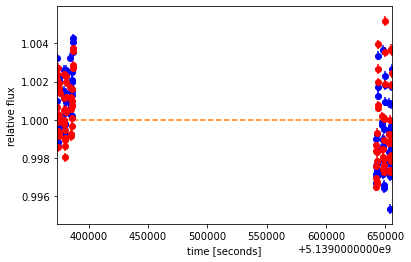

In [19]:
# Compute a limb-darkened light curve using starry
t = data_df['times']*86400                                       #This converts it to seconds
u = []
flux = data_df['flux']
yerr = data_df['unc']
# Note: the `eval` is needed because this is using Theano in
# the background

plt.errorbar(t[idx_fwd], flux[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], flux[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("relative flux")
plt.xlabel("time [seconds]")
plt.xlim(t.min(), t.max());

In [20]:
fluxppm = (data_df['flux'] - 1)*1e6

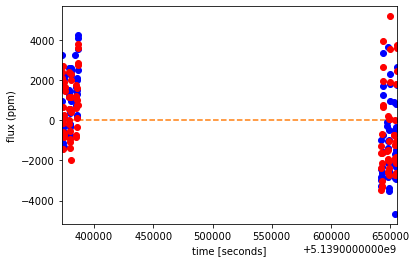

In [21]:
plt.errorbar(t[idx_fwd], fluxppm[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], fluxppm[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("flux (ppm)")
plt.xlabel("time [seconds]")
plt.xlim(t.min(), t.max());

In [22]:
print("code took", (time.time()-start_time)/60, "minutes")

code took 25.836005103588104 minutes


In [23]:
t0min = 5139641925.461664

Text(0.5, 0, 'time [seconds]')

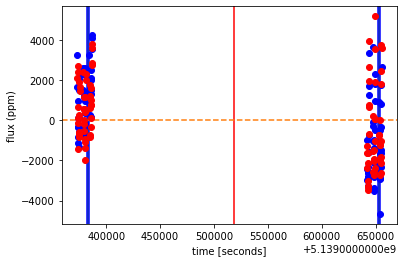

In [24]:
plt.axvline(10049+t.min(), color = 'g', label = 'axvline - full height') #Middle of transit
plt.axvline(10049+t.min()+134952.6312, color = 'r', label = 'axvline - full height') #when the planet is behind fully
plt.axvline(10049+t.min()+868.32, color = 'b', label = 'axvline - full height')      #these are either end of the transit
plt.axvline(10049+t.min()-868.32, color = 'b', label = 'axvline - full height')

plt.axvline(11145.2654766+t0min, color = 'g', label = 'axvline - full height') #Middle of transit
plt.axvline(11145.2654766+t0min+868.32, color = 'b', label = 'axvline - full height')
plt.axvline(11145.2654766+t0min-868.32, color = 'b', label = 'axvline - full height')

plt.errorbar(t[idx_fwd], fluxppm[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], fluxppm[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("flux (ppm)")
plt.xlabel("time [seconds]")
# plt.xlim(t.min(), t.max());
